In [106]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import math
import joblib

In [107]:
df=pd.read_parquet('cleaned_data/track_features.parquet')

In [108]:
df.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,336438,326.013336,1971,99.582885,0.716209,0.366495,0.332605,0.439835,5.805774,0.238847,...,4,0.223395,0.146012,-0.706908,0.259496,0.481157,0.238427,-0.098389,-0.254960,-0.227383
1,1584495,147.813324,1963,97.272035,0.839460,0.362212,0.389829,0.507580,6.845427,0.420476,...,4,0.484702,0.039554,-0.539554,0.105141,0.692589,0.226047,-0.468162,0.164389,-0.769024
2,1498298,110.400002,1974,99.620384,0.054673,0.495002,0.589378,0.552311,9.361949,0.842938,...,4,0.818441,0.083863,-0.242108,-0.014258,0.096396,0.417641,-0.050576,-0.204757,-0.172563
3,112304,237.653336,1988,96.796830,0.042606,0.389634,0.359044,0.585673,6.068578,0.665398,...,4,0.594829,0.192498,0.340039,0.034846,-0.389794,0.518381,0.185008,-0.079907,-0.016978
4,395210,174.600006,1987,97.905891,0.249982,0.513640,0.485435,0.635095,7.198735,0.408715,...,4,0.591289,0.270586,-0.411061,0.165898,0.225652,0.335518,-0.036643,-0.016300,-0.446870


In [109]:
keys=df['track_id'].values

In [110]:
df=df.drop('track_id',axis=1)

In [111]:
df.head()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,326.013336,1971,99.582885,0.716209,0.366495,0.332605,0.439835,5.805774,0.238847,1.010700,...,4,0.223395,0.146012,-0.706908,0.259496,0.481157,0.238427,-0.098389,-0.254960,-0.227383
1,147.813324,1963,97.272035,0.839460,0.362212,0.389829,0.507580,6.845427,0.420476,1.000398,...,4,0.484702,0.039554,-0.539554,0.105141,0.692589,0.226047,-0.468162,0.164389,-0.769024
2,110.400002,1974,99.620384,0.054673,0.495002,0.589378,0.552311,9.361949,0.842938,0.957766,...,4,0.818441,0.083863,-0.242108,-0.014258,0.096396,0.417641,-0.050576,-0.204757,-0.172563
3,237.653336,1988,96.796830,0.042606,0.389634,0.359044,0.585673,6.068578,0.665398,0.947322,...,4,0.594829,0.192498,0.340039,0.034846,-0.389794,0.518381,0.185008,-0.079907,-0.016978
4,174.600006,1987,97.905891,0.249982,0.513640,0.485435,0.635095,7.198735,0.408715,1.014063,...,4,0.591289,0.270586,-0.411061,0.165898,0.225652,0.335518,-0.036643,-0.016300,-0.446870


In [112]:
# Standardize the features
scaler = StandardScaler()
values = scaler.fit_transform(df)

In [113]:
print(keys.shape[0])
print(values.shape[0])


3706388
3706388


In [114]:
track_features={}
for i in range(keys.shape[0]):
    track_features[keys[i]]=values[i]

In [ ]:
joblib.dump(track_features,'track_features.joblib')

In [115]:
# Choose the number of clusters (K)
k=math.sqrt(keys.shape[0])
k=int(k)
print(k)


1925


In [116]:

# Instantiate the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(X_train)

# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the clusters
# plt.scatter(X_train[:, ], X_train[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [ ]:
joblib.dump(kmeans, 'Kmeans_clustering_.joblib')

['Kmeans_clustertin.joblib']

In [ ]:
# Find the optimal number of clusters using the elbow method
# inertia = []
# for k in range(2, 2000):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(scaled_features)
#     inertia.append(kmeans.inertia_)

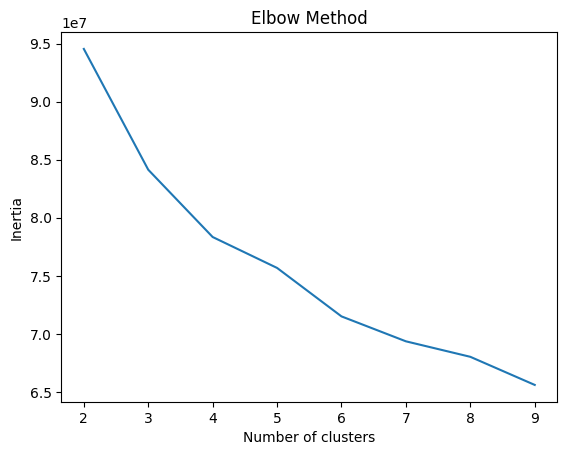

In [ ]:
# plt.plot(range(2, 2000), inertia)
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()


In [ ]:
# Choose the optimal number of clusters and perform k-means clustering
# k = int(input("Enter the number of clusters: "))
# kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
# clusters = kmeans.fit_predict(scaled_features)

In [ ]:

# Add cluster labels to the dataset
# features['Cluster'] = clusters


In [ ]:
# Output the results
# print(data)


In [ ]:
# Calculate the Davies-Bouldin index to measure the quality of the clustering
# db_index = davies_bouldin_score(scaled_features, clusters)
# print("The Davies-Bouldin index is:", db_index)


In [ ]:
# Calculate the silhouette score to measure the quality of the clustering
# silhouette_avg = silhouette_score(scaled_features,clusters)
# print("The average silhouette score is:", silhouette_avg)

# features.to_csv(R"C:\Users\Namra\Desktop\AI_Data\clustered_data1.csv", index=False)